# Analysis Notebook for OPTN STAR Data 
_Author: Christine Harvey (ceharvs@gmail.com)_

This notebook is meant to serve as an example and starting point for performing data analyis with Jupyter Notebooks when UNOS STAR file data has been successfully ported into MongoDB.

For instructions on how to get started with Jupyter Notebooks, go to: https://jupyter-notebook-beginner-guide.readthedocs.io

This notebook provides an example to connecting to the database, creating a query of columns, and developing a simple graph.

Part of the Transplant2Mongo code repository: https://github.com/ceharvs/transplant2mongo

In [1]:
# Import useful libraries
import pymongo
import pandas as pd
import seaborn as sns

## Database Connection and Setup
This code connects to the MongoDB database generated by running *make all*.

In [2]:
# Define your database client and database name
mongo_server = 'localhost:27017'  # Default is 'localhost'
database = 'organ_data'  # Default is 'organ_data'

### Select a MongoDB Collection to Work With
Running the Makefile creates collections depending on what data you have available.  Possible collections are:
* Deceased_Donor
* Living_Donor
* Intestine
* Kidney_Pancreas
* Liver
* Thoracic

In [3]:
# Define the variable for the collection
collection = 'Deceased_Donor'

### Connect to the Database
Create a connection with MongoClient to the database and to the specific collection

In [4]:
db = pymongo.MongoClient(mongo_server)[database]
coll = db[collection]

## Query Data
Code in this section will make a query to pull data from the MongoDB database using the variables defined above.

### Simple Query
The simpliest MongoDB query is to just "Find One" which returns a single item from the database.  The code below demonstrates how the command works.

In [5]:
# Return a single item from the database.
coll.find_one()

{'_id': '1',
 'DON_DATE': '10222001',
 'HOME_STATE_DON': 'MD',
 'AGE_DON': 27,
 'GENDER_DON': 'F',
 'DONOR_ID': 1,
 'ABO': 'A',
 'Inotropic_Meds': {'MEDICATION': 'Medicine K'},
 'AGE_BIN': '18-34'}

### Query for Multiple Items
The database can also execute queries for mutliple items, as shown below. The query in this section returns all items in the database and stores them in a variable called _results_. <br>
**Do not run this with a large database, it will be extremely slow.**

In [6]:
# Return all items from the database.
results = coll.find()

The results can be placed into a Pandas DataFrame to nearly print out and be exported into a .CSV file.  

In [7]:
# Return all items from the database.
pd.DataFrame(list(results))

,ABO,AGE_BIN,AGE_DON,DONOR_ID,DON_DATE,GENDER_DON,HOME_STATE_DON,Inotropic_Meds,_id
0,A,18-34,27,1,10222001,F,MD,{'MEDICATION': 'Medicine K'},1
1,B,50-64,60,2,09142008,F,OH,NaN,2
2,AB,50-64,55,6,05042011,M,CA,{'MEDICATION': 'Medicine A'},6
3,O,18-34,32,8,01102015,M,TN,NaN,8
4,A,35-49,35,11,02282017,M,OK,NaN,11


### Complex Queries
Queries can be structured to select information on only certain patients or specific columns or attributes fromt the database.

#### Selecting a Subset of the Data
Here we structure a query to select only 'F' or Female deceased donors from the database.  To search for a specific subset, we use a dictionary to search for the specific traits of interest.

In [8]:
# Return all items from the database.
results = coll.find({'GENDER_DON': 'F'})
pd.DataFrame(list(results))

,ABO,AGE_BIN,AGE_DON,DONOR_ID,DON_DATE,GENDER_DON,HOME_STATE_DON,Inotropic_Meds,_id
0,A,18-34,27,1,10222001,F,MD,{'MEDICATION': 'Medicine K'},1
1,B,50-64,60,2,09142008,F,OH,NaN,2


#### Selecting Specific Attributes of the Data
Here we structure a query to select only the donor's unique id, age, and blood type.  Querying for specific attributes is done by using a blank first set of brackets {}, followed by a second set of brackets specifying the attributes to return. By default, the \_id attribute is always returned.

In [9]:
# Select only the relevant columns
results = coll.find({},{'AGE_DON': 1, 'ABO': 1})
pd.DataFrame(list(results))

,ABO,AGE_DON,_id
0,A,27,1
1,B,60,2
2,AB,55,6
3,O,32,8
4,A,35,11


#### Selecting Specific Attributes and a Subset
In a combined query, we'll select only female donors and also only return the age and blood type.  Here we combine the set of brackets forming the selection of the subset of the data with the selection of which attributes to include.

In [10]:
# Select only the items of interest
results = coll.find({'GENDER_DON': 'F'},{'AGE_DON': 1, 'ABO': 1})
pd.DataFrame(list(results))

,ABO,AGE_DON,_id
0,A,27,1
1,B,60,2


## Graphing and Analysis
Here we provide a very simple introduction to performing statistics on the data and creating graphs.  Results from queries can be used to compute statistics or generate graphics.

In [11]:
# Return all items from the database
results = coll.find()
# Put results into a Pandas DataFrame
df = pd.DataFrame(list(results))

### Analysis
Although these statistics are not particularly useful, they show a brief preview of how to convert data times and perform basic computations on data in Python using Pandas DataFrames. 

#### Compute the mean age of donors
Use the Pandas library and the dataframe to compute the mean age of donors. First we select only the column of interest, and then apply the mean function.

In [12]:
# Compute mean donor age
df['AGE_DON'].mean()

41.8

#### Compute the mean date of donation
Use the Pandas library and the dataframe to compute the minimum date of donation in the database. First we select only the column of interest, convert to a date variable type, and then apply the min function.

In [13]:
# Compute mean donation date
pd.to_datetime(df['DON_DATE'], format="%m%d%Y").min()

Timestamp('2001-10-22 00:00:00')

### Graphics
Graphics can be created in Python and Jupyter Notebooks to display information about the data set in a simple interface that can be changed and updated quickly.

### Gender Distribution of Donors
The Seaborn plotting library has colorful and easy-to-use graphics tools for showing an overview of data.  The countplot function is used here to show the total number of male and female donors.

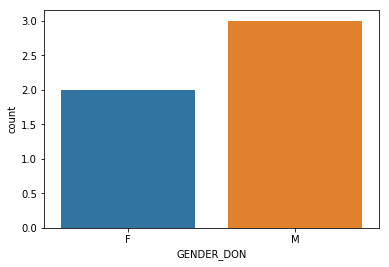

In [14]:
# Create a plot using countplot
sns.countplot(x='GENDER_DON', data=df)

### Age Distribution of Donors by Gender
The catplot functionality allows the plotting of multiple attributes on a single axis. The graph below shows the Gender, Age, and Blood Type of the deceased donors in the database.

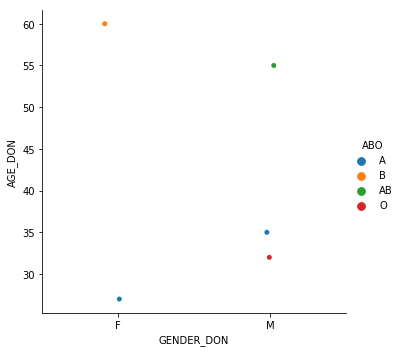

In [15]:
# Create a plot using cat plot
sns.catplot(x="GENDER_DON", y="AGE_DON", hue="ABO", data=df);